## Titanic Survival Prediction
#### Aim: Building a model that predicts whether a passenger on the titanic survives or not

##### Uploading datasets into a colab

In [4]:
from google.colab import files

uploaded = files.upload()


Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [5]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:

# Load the dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Display the first few rows
df.head(20)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
df.shape

(891, 12)

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Analysing the data

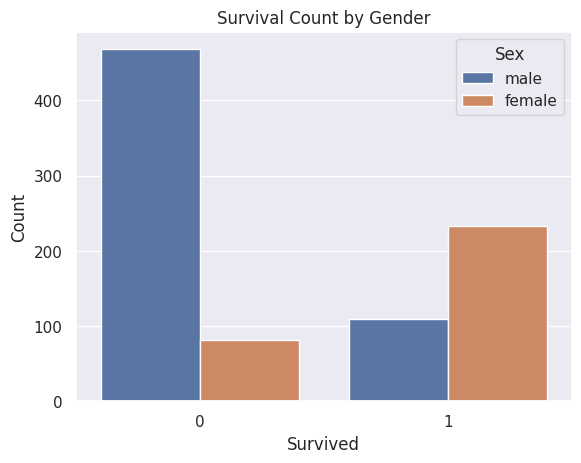

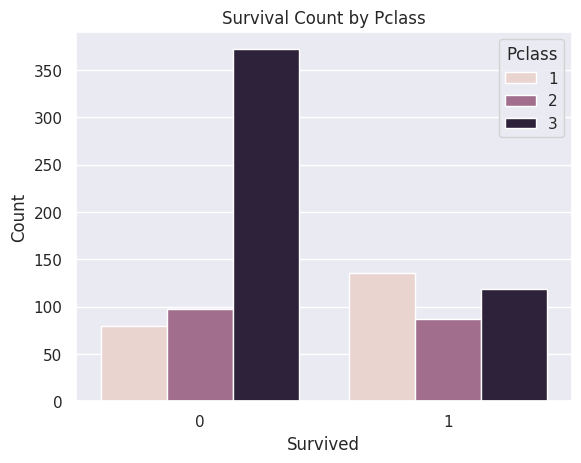

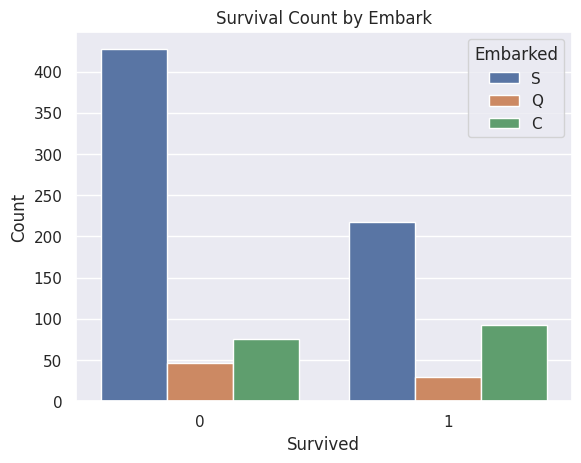

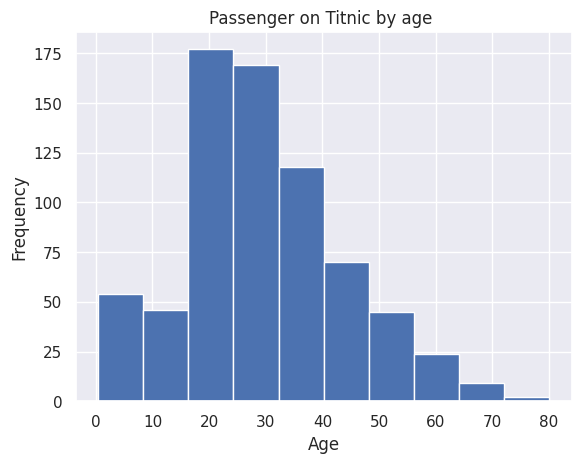

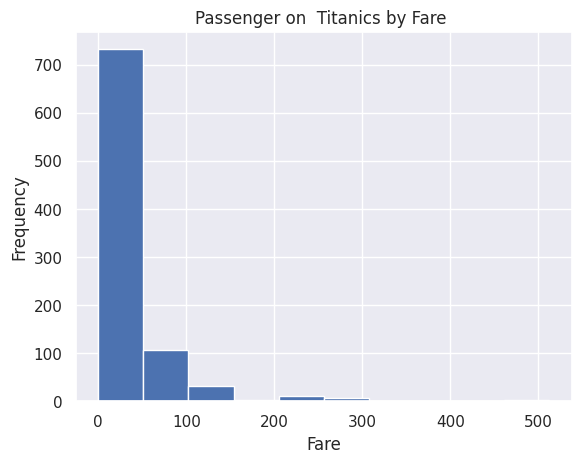

In [9]:
sns.set(style="darkgrid")


# Survival based on gender
plot = sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# survival based on Pclass
plot = sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Count by Pclass')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()
# survival based on Embakred
plot = sns.countplot(x='Survived', hue='Embarked', data=df)
plt.title('Survival Count by Embark')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Passenger based on age distribution
plot = df['Age'].plot.hist()
plt.title('Passenger on Titnic by age ')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Passenger based on fares
plot = df['Fare'].plot.hist()
plt.title('Passenger on  Titanics by Fare ')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


### Data Preprocessing

In [10]:
# finding null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Pclass', ylabel='Age'>

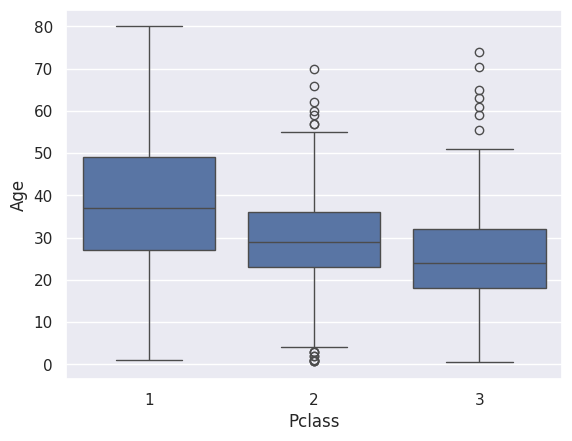

In [11]:

# Box plot for numerical columns to visualize outliers
sns.boxplot(x='Pclass',y='Age',data=df)


In [12]:
# Drop unnecessary columns
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df = df.drop(columns_to_drop, axis=1)

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
# Handling missing values and outliers
# Impute missing values in 'Age' with the mean
df['Age'].fillna(df['Age'].mean(), inplace=True)
# Remove rows with missing values in 'Embarked'
df.dropna(subset=['Embarked'], inplace=True)


In [15]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [16]:

# Filter columns with object (categorical) data type
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['Sex', 'Embarked'], dtype='object')


In [17]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()
#label encoder encodes data into alphabetical order
# Fit and transform 'Embarked' and 'Sex' column
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
df['Sex'] = label_encoder.fit_transform(df['Sex'])




<Axes: xlabel='Survived', ylabel='count'>

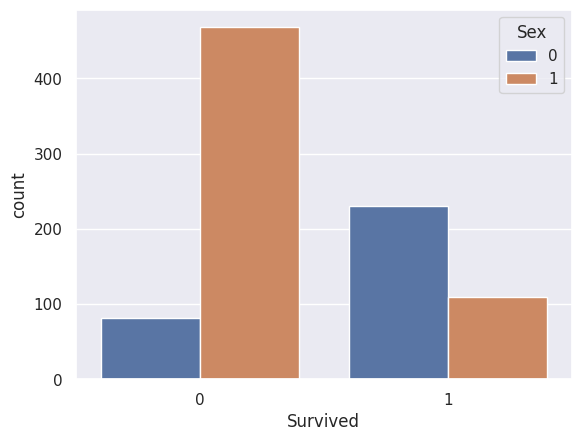

In [18]:
sns.countplot(x='Survived', hue='Sex', data=df)

<Axes: xlabel='Survived', ylabel='count'>

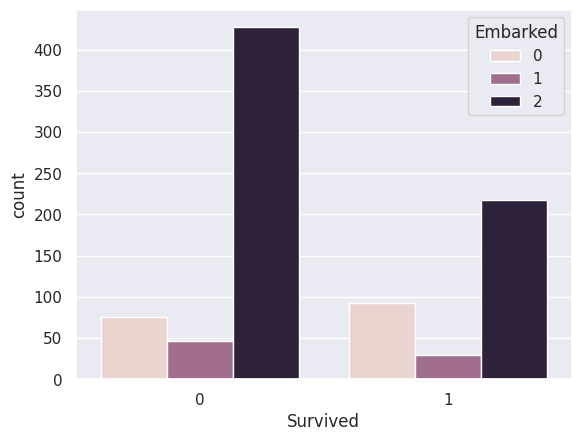

In [19]:
sns.countplot(x='Survived', hue='Embarked', data=df)

In [21]:

df.head(30)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
5,0,3,1,29.699118,0,0,8.4583,1
6,0,1,1,54.000000,0,0,51.8625,2
7,0,3,1,2.000000,3,1,21.0750,2
8,1,3,0,27.000000,0,2,11.1333,2
9,1,2,0,14.000000,1,0,30.0708,0


In [22]:
# Standard scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


In [23]:
# Remove outliers using z-score
from scipy.stats import zscore

z_scores = zscore(df[['Age', 'Fare']])
df_no_outliers = df[(z_scores < 3).all(axis=1)]


In [24]:
#  Creating a new feature 'FamilySize' by combining 'SibSp' and 'Parch'
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


In [25]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,1,-0.590495,1,0,-0.500240,2,2
1,1,1,0,0.643971,1,0,0.788947,0,2
2,1,3,0,-0.281878,0,0,-0.486650,2,1
3,1,1,0,0.412509,1,0,0.422861,2,2
4,0,3,1,0.412509,0,0,-0.484133,2,1


### Training the Model

In [26]:
#  Splitting data into features (X) and target variable (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LogisticRegression()

### Making predictions

In [31]:
# Make predictions on the test data
y_pred = model.predict(X_test)


In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       109
           1       0.69      0.78      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.79      0.78      0.78       178

Confusion Matrix:
[[85 24]
 [15 54]]


In [37]:
from sklearn.ensemble import RandomForestClassifier


# Create an instance of the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the performance of the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

# Display classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Display confusion matrix
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.75
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       109
           1       0.65      0.74      0.69        69

    accuracy                           0.75       178
   macro avg       0.74      0.75      0.74       178
weighted avg       0.76      0.75      0.75       178

Random Forest Confusion Matrix:
[[82 27]
 [18 51]]
